# Jeudi 18 Avril 


## Model Selection and Evaluation
* Voir   https://app.jedha.co/course/model-selection-and-evaluation-ft/model-selection-evaluation-ft



# Exercise - Model Evaluation
This exercise will focus on evaluating models' general performances through the different evaluation techniques as well as illustrate the statistical properties described in the lecture.

## Hold out method
1. Let's start by importing the librairies we will need for the exercise

In [231]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import plotly.express as px



2. Let's import the iris data which will be our first object of study
create an object data that contains the explanatory variables and an object target that contains the target variable.

In [232]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns = [a.split(" (")[0].replace(" ","_") for a in iris.feature_names])
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [233]:
target = pd.DataFrame(iris.target, columns=["species"])


In [234]:
target.sample(10)

,species
25,0
127,2
46,0
120,2
63,1
43,0
6,0
142,2
94,1
107,2


3. Split the data between a train set and a test set

In [235]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


4. Plot the distribution of the first two variables for the full data set, the train set, and the test set, do you notice any differences? what does it mean for the evaluation of our model ?

Hint: you can use plotly's [density_contour](https://plotly.com/python-api-reference/generated/plotly.express.density_contour.html)

In [236]:
fig = px.density_contour(data, 'sepal_width', 'sepal_length', title = 'Full', height=400,width=800)
fig.show()

In [237]:
fig = px.density_contour(X_train, 'sepal_width', 'sepal_length', title = 'Train', height=400,width=800)
fig.show()

In [238]:
fig = px.density_contour(X_test, 'sepal_width', 'sepal_length', title = 'Test',  height=400,width=800)
fig.show()

5. Normalize the data (it is already very clean so there is no need to do other preprocessings) 

In [239]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [240]:
type(X_train_norm)

numpy.ndarray

6. What is the baseline (dummy model) for this model? Calculate the accuracy for this baseline model.

In [241]:
counts = y_train.value_counts()
counts

species
2          41
0          37
1          34
Name: count, dtype: int64

In [242]:
# dummyclassifier sklearn

In [243]:
# Dummy model => ALWAYS predict the most frequent category
# compte le nb d'occurences de la valeur la plus présente dans y_train et divise par long de y_train

most_common_value = counts.idxmax()
nombre_occurrences = counts[most_common_value]
score = nombre_occurrences/len(y_train)
score




0.36607142857142855

7. Create an instance of a SVM model with a linear kernel, calculate the resubstitution score and hold out score for this model. What can you say about the bias for each of these evaluation metrics?

In [244]:
svc = SVC(kernel="linear")
svc.fit(X_train_norm, y_train)

print(svc.score(X_train_norm,y_train))
print(svc.score(X_test_norm, y_test))

0.9732142857142857
0.9736842105263158


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



8. Look at the distribution of the target variable in the full dataset, the train set and the test set. Are they identically distributed?

In [245]:
target.value_counts()/len(target)

species
0          0.333333
1          0.333333
2          0.333333
Name: count, dtype: float64

In [246]:
y_train.value_counts()/len(y_train)

species
2          0.366071
0          0.330357
1          0.303571
Name: count, dtype: float64

In [247]:
y_test.value_counts()/len(y_test)

species
1          0.421053
0          0.342105
2          0.236842
Name: count, dtype: float64

9. Perform a new train test split and this time make sure that the target variable's distribution is preserved.

In [248]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0, stratify=target)


# ! Je le fais tout de suite 
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)



In [249]:
target.value_counts()/len(target)

species
0          0.333333
1          0.333333
2          0.333333
Name: count, dtype: float64

In [250]:
y_train.value_counts()/len(y_train)

species
2          0.339286
0          0.330357
1          0.330357
Name: count, dtype: float64

In [251]:
y_test.value_counts()/len(y_test)

species
0          0.342105
1          0.342105
2          0.315789
Name: count, dtype: float64

10. What was the influence of this operation on the distribution of the explanatory variables?

In [252]:
fig = px.density_contour(data, 'sepal_width', 'sepal_length', title = 'Full', height=400, width=800)
fig.show()

In [253]:
fig = px.density_contour(X_train, 'sepal_width', 'sepal_length', title = 'Train', height=400, width=800)
fig.show()

In [254]:
fig = px.density_contour(X_test, 'sepal_width', 'sepal_length', title = 'Test',  height=400, width=800)
fig.show()

11. Calculate the new resubstitution score and holdout score for the new stratified split. What is the influence of stratifying data on the bias of each evaluation metric?

In [255]:
svc = SVC(kernel="linear")
svc.fit(X_train_norm, y_train)

print(svc.score(X_train_norm,y_train))
print(svc.score(X_test_norm, y_test))

0.9642857142857143
1.0


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



12. Create a loop that will repeat 100 times the hold out method for the non-stratified and the stratified splits respectively, then calculate the average score in both cases, the standard deviation and the 95% confidence intervals. Plot the resusbstitution and hold out score distribution for both cases, what can you conclude ?

In [284]:
scores_train_no_strat = []
scores_test_no_strat  = []

scores_train_strat    = []
scores_test_strat     = []

for i in range(100): 
  # X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
  X_train, X_test, y_train, y_test = train_test_split(data, target)
  sc = StandardScaler()
  X_train_norm = sc.fit_transform(X_train)
  X_test_norm = sc.transform(X_test)
  
  svc = SVC(kernel="linear")
  svc.fit(X_train_norm, y_train.values.ravel())

  scores_train_no_strat.append(svc.score(X_train_norm,y_train))
  scores_test_no_strat.append(svc.score(X_test_norm, y_test))



  # X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0, stratify=target)
  X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target)
  sc = StandardScaler()
  X_train_norm = sc.fit_transform(X_train)
  X_test_norm = sc.transform(X_test)
  
  svc = SVC(kernel="linear")
  svc.fit(X_train_norm, y_train.values.ravel())
  
  scores_train_strat.append(svc.score(X_train_norm,y_train))
  scores_test_strat.append(svc.score(X_test_norm, y_test))

scores_train_no_strat = pd.DataFrame(scores_train_no_strat)
# ! .mean() retourne un numpy.float64 sur lequel on peut appliquer .round(3)
print(scores_train_no_strat[0].mean().round(3))
# ! .std() retourne un float sur lequel on peut pas appliquer .round(3)
print(round(scores_train_no_strat[0].std(), 3))
print(scores_train_no_strat[0].quantile(0.025).round(3))
print(scores_train_no_strat[0].quantile(0.975).round(3))
print()

scores_test_no_strat = pd.DataFrame(scores_test_no_strat)
print(scores_test_no_strat[0].mean().round(3))
print(scores_test_no_strat[0].std())
print(scores_test_no_strat[0].quantile(0.025).round(3))
print(scores_test_no_strat[0].quantile(0.975).round(3))
print()

scores_train_strat = pd.DataFrame(scores_train_strat)
print(scores_train_strat[0].mean().round(3))
print(scores_train_strat[0].std())
print(scores_train_strat[0].quantile(0.025).round(3))
print(scores_train_strat[0].quantile(0.975).round(3))
print()

scores_test_strat = pd.DataFrame(scores_test_strat)
print(scores_test_strat[0].mean().round(3))
print(scores_test_strat[0].std())
print(scores_test_strat[0].quantile(0.025).round(3))
print(scores_test_strat[0].quantile(0.975).round(3))


# fig = px.density_contour(X_test, 'sepal_width', 'sepal_length', title = 'Test',  height=400,width=800)
# fig.show()



0.976
0.009
0.964
0.991

0.964
0.027652140396703207
0.907
1.0

0.978
0.010425938977678451
0.955
0.991

0.961
0.027865080079196407
0.895
1.0


In [292]:
fig = px.histogram(scores_test_no_strat, nbins = 10, height=400, width=800)
fig.show()

fig = px.histogram(scores_test_strat, nbins = 10, height=400, width=800)
fig.show()

The average resubstitution score for the non stratified data is : 
 0.9773482142857145 
 The standard deviation of the resubstitution score for the non stratified data is : 
 0.00992892069658024 
 The 95 percent confidence interval of the resubstitution score for the non stratified data is : 
 [0.9553571428571429,0.9910714285714286] 

The average hold out score for the non stratified data is : 
 0.9633157894736841 
 The standard deviation of the hold out score for the non stratified data is : 
 0.027559605511612094 
 The 95 percent confidence interval of the hold out score for the non stratified data is : 
 [0.9210526315789473,1.0] 

The average resubstitution score for the stratified data is : 
 0.9767857142857143 
 The standard deviation of the resubstitution score for the stratified data is : 
 0.00910539198855854 
 The 95 percent confidence interval of the resubstitution score for the stratified data is : 
 [0.9642857142857143,0.9910714285714286] 

The average hold out score for th

In [ ]:
fig = px.histogram (scores_train_no_strat, nbins=10, height=400, width=800)
fig.show()

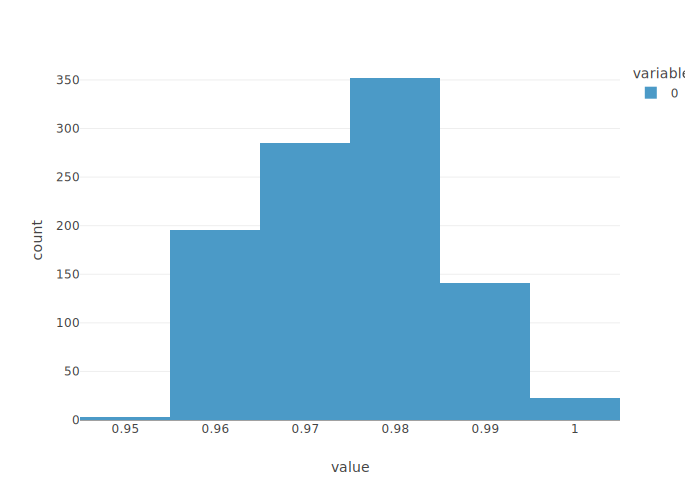

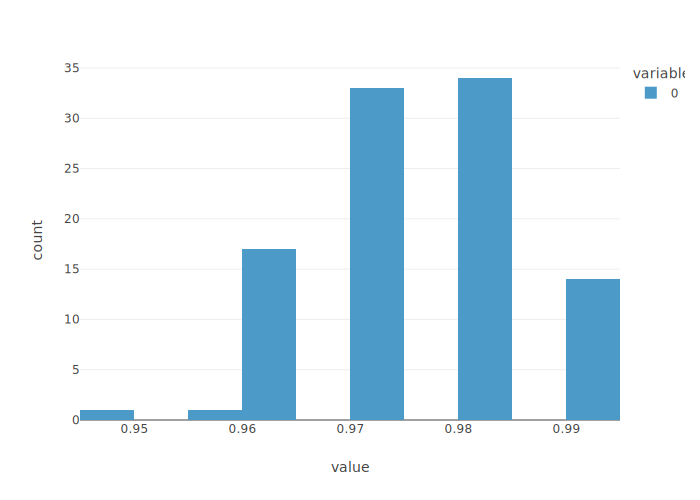

## Bootstrap Method
This section of the exercise will keep using the iris dataset and implement the bootstrap evaluation techniques that were introduced in the lecture

1. First let's use the ```sklearn.utils.resample``` function to create 100 bootstrap samples (don't forget to also generate the out of bag samples)

In [214]:
bs = [] # bootstrap
bs_target = []

oob = [] # out of bag
oob_target = []

for i in range(100):
    # echantillonnage avec remise
    sample, sample_target = resample(data, target, replace = True, n_samples = len(data), stratify = target)
    sample_index = sample.index
    bs.append(sample)
    bs_target.append(sample_target)

    # ce que l'on a pas pris on le met de côté
    oob_sample = [index for index in data.index if index not in sample_index]
    oob.append(data.iloc[oob_sample,:])
    oob_target.append(target.iloc[oob_sample,:])

print("first bootstrap sample : \n")
display(bs[0])

print("first out of bag sample : \n")
display(oob[0])

print("first bootstrap sample target : \n")
display(bs_target[0])

print("first out of bag sample target : \n")
display(oob_target[0])

first bootstrap sample : 



,sepal_length,sepal_width,petal_length,petal_width
57,4.9,2.4,3.3,1.0
85,6.0,3.4,4.5,1.6
104,6.5,3.0,5.8,2.2
13,4.3,3.0,1.1,0.1
0,5.1,3.5,1.4,0.2
...,...,...,...,...
136,6.3,3.4,5.6,2.4
112,6.8,3.0,5.5,2.1
112,6.8,3.0,5.5,2.1
80,5.5,2.4,3.8,1.1


first out of bag sample : 



,sepal_length,sepal_width,petal_length,petal_width
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1


first bootstrap sample target : 



,species
57,1
85,1
104,2
13,0
0,0
...,...
136,2
112,2
112,2
80,1


first out of bag sample target : 



,species
1,0
2,0
3,0
4,0
5,0
7,0
8,0
9,0
11,0
12,0


2. Let's normalize each couple of bootstrap and out of bag samples

In [215]:
bs_norm = []
oob_norm = []
sc =StandardScaler()

for b,o in zip(bs,oob):
    b_norm = sc.fit_transform(b)
    o_norm = sc.transform(o)
    bs_norm.append(b_norm)
    oob_norm.append(o_norm)

print("first normalised bootstrap sample : \n")
print(bs_norm[0])
print("first normalised out of bag sample : \n")
print(oob_norm[0])

first normalised bootstrap sample : 

[[-1.22799738e+00 -1.71914945e+00 -2.65191053e-01 -2.62054854e-01]
 [ 9.02821756e-02  7.58011140e-01  4.05235766e-01  5.18903320e-01]
 [ 6.89500155e-01 -2.32853095e-01  1.13153149e+00  1.29986149e+00]
 [-1.94705895e+00 -2.32853095e-01 -1.49430689e+00 -1.43349212e+00]
 [-9.88310188e-01  1.00572720e+00 -1.32670018e+00 -1.30333242e+00]
 [-1.10815378e+00 -2.32853095e-01 -1.21496238e+00 -1.30333242e+00]
 [ 2.12762331e+00 -2.32853095e-01  1.29913819e+00  1.43002119e+00]
 [-1.49405016e-01  2.24430749e+00 -1.43843799e+00 -1.30333242e+00]
 [-9.88310188e-01  1.00572720e+00 -1.32670018e+00 -1.17317272e+00]
 [-3.89092208e-01 -2.32853095e-01  1.81760160e-01  1.28424233e-01]
 [-1.10815378e+00  1.00572720e+00 -1.38256909e+00 -1.17317272e+00]
 [ 1.40856173e+00 -2.32853095e-01  1.18740039e+00  1.16970180e+00]
 [-1.82721536e+00  2.62579023e-01 -1.38256909e+00 -1.30333242e+00]
 [ 1.16887454e+00  2.62579023e-01  1.07566259e+00  1.43002119e+00]
 [-1.58752817e+00  7.580

3. Let's now train the svc linear model on our bootstrap samples, create a list of resubstitution scores on the bootstrap samples and a list of out of bag scores. And plot the distributions of both scores, what do you think? is it coherent with the lecture ?

In [216]:
bs_score = []
oob_score = []

svc = SVC(kernel="linear")
for b, o, b_t, o_t in zip(bs_norm, oob_norm, bs_target, oob_target):
    svc.fit(b,b_t)
    bs_score.append(svc.score(b,b_t))
    oob_score.append(svc.score(o, o_t))


fig = px.histogram(bs_score, title = 'Bootstrap', nbins = 10)
fig.show()
fig = px.histogram(oob_score, title = 'Out of bag', nbins = 10)
fig.show()

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\phili\a

4. Calculate the boostrap accuracy using the following formula from the lecture :
$$ACC_{bootstrap} = \frac{1}{b}\sum_{i=1}^{b}(0.632\times ACC_{h,i} + 0.368\times ACC_{r,i})$$


In [217]:
acc_bootstrap = 0.632 * np.array(oob_score) + 0.368 * np.array(bs_score)

print("The boostrap score gives the following average : \n {0} \n Its standard deviation is : \n {1} \n Its 95 percent confidence interval is : \n [{2},{3}] ".format(acc_bootstrap.mean(), acc_bootstrap.std(), np.quantile(acc_bootstrap, 0.025), np.quantile(acc_bootstrap,0.975)))

# The boostrap evaluation method seems to give a more precise value for the general score.

The boostrap score gives the following average : 
 0.9663558505278715 
 Its standard deviation is : 
 0.013260463099962868 
 Its 95 percent confidence interval is : 
 [0.9409124321475625,0.9890213333333333] 


The boostrap score gives the following average : 
 0.971192591968157 
 Its standard deviation is : 
 0.011917442547463268 
 Its 95 percent confidence interval is : 
 [0.9435714285714285,0.9914746666666666] 


## Cross Validation and Hyper Parameter optimization
This last section of the exercise will focus on model evaluation through cross validation 

### K Fold grid search cross validation
1. Import the digits dataset from sklearn

In [218]:
digits = load_digits()
data = digits.data
target = digits.target

In [219]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

2. This dataset contains images, it should not be normalized using Standard Scaler as this would change the constrast in the pictures and potentially add a lot of unwanted noise to the data. Instead we will simply divide each pixel value by 255 to work with values between 0 and 1.
Since this operation does not rely on data distribution you may apply it directly on the full dataset

In [220]:
data_norm = data/255.0
data_norm

array([[0.        , 0.        , 0.01960784, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03921569, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0627451 , 0.03529412,
        0.        ],
       ...,
       [0.        , 0.        , 0.00392157, ..., 0.02352941, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00784314, ..., 0.04705882, 0.        ,
        0.        ],
       [0.        , 0.        , 0.03921569, ..., 0.04705882, 0.00392157,
        0.        ]])

array([[0.        , 0.        , 0.01960784, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03921569, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0627451 , 0.03529412,
        0.        ],
       ...,
       [0.        , 0.        , 0.00392157, ..., 0.02352941, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00784314, ..., 0.04705882, 0.        ,
        0.        ],
       [0.        , 0.        , 0.03921569, ..., 0.04705882, 0.00392157,
        0.        ]])

3. We are now going to start the process of determining the best set of hyper parameters for two different models through cross validation. Start by separating the dataset into a train and test set. Make sure to stratify the split according to the target variable.

In [221]:
X_train, X_test, y_train, y_test = train_test_split(data,target, stratify = target)

4. Create an instance of an SVM model and an instance of a random forest model

In [222]:
svc = SVC()
rf = RandomForestClassifier()

5. Run a grid search cross validation process in order to determine the best set of parameters for both these models. (set ```return_train_scores=True```)

In [223]:
svc_param_grid = {
  "kernel"  : ["linear","rbf"],
  "C"       : [10.0**i for i in np.arange(-5,3,1)]
}

rf_param_grid = {
  "n_estimators"  : np.arange(1,600,50),
  "max_depth"     : np.arange(3,16,2)
}

svc_grid = GridSearchCV(svc, param_grid=svc_param_grid, cv = 5, return_train_score=True)
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, cv = 5, return_train_score=True)

%time svc_grid.fit(X_train, y_train)
%time rf_grid.fit(X_train, y_train)

CPU times: total: 953 ms
Wall time: 7.19 s
CPU times: total: 1min 59s
Wall time: 8min 20s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15]),
                         'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551])},
             return_train_score=True)

CPU times: user 11.9 s, sys: 2.2 ms, total: 11.9 s
Wall time: 11.9 s
CPU times: user 5min 39s, sys: 1.61 s, total: 5min 40s
Wall time: 5min 41s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15]),
                         'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551])},
             return_train_score=True)

6. What set of parameters was identified to be the best for each model?

In [224]:
print("the best set of parameters for the svm model is : \n {0} \n the best set of parameters for the random forest is : \n {1} ".format(svc_grid.best_params_, rf_grid.best_params_))

the best set of parameters for the svm model is : 
 {'C': 10.0, 'kernel': 'rbf'} 
 the best set of parameters for the random forest is : 
 {'max_depth': 15, 'n_estimators': 301} 


the best set of parameters for the svm model is : 
 {'C': 10.0, 'kernel': 'rbf'} 
 the best set of parameters for the random forest is : 
 {'max_depth': 11, 'n_estimators': 51} 


7. Compare the distribution of train and test scores for the best svm and best random forest model

In [225]:
best_svm_index = np.argmin(svc_grid.cv_results_["rank_test_score"])

svc_cv_train_scores = [svc_grid.cv_results_["split0_train_score"][best_svm_index],
    svc_grid.cv_results_["split1_train_score"][best_svm_index],
    svc_grid.cv_results_["split2_train_score"][best_svm_index],
    svc_grid.cv_results_["split3_train_score"][best_svm_index],
    svc_grid.cv_results_["split4_train_score"][best_svm_index]]

svc_cv_test_scores = [svc_grid.cv_results_["split0_test_score"][best_svm_index],
    svc_grid.cv_results_["split1_test_score"][best_svm_index],
    svc_grid.cv_results_["split2_test_score"][best_svm_index],
    svc_grid.cv_results_["split3_test_score"][best_svm_index],
    svc_grid.cv_results_["split4_test_score"][best_svm_index]]

best_rf_index = np.argmin(rf_grid.cv_results_["rank_test_score"])

rf_cv_train_scores = [rf_grid.cv_results_["split0_train_score"][best_rf_index],
    rf_grid.cv_results_["split1_train_score"][best_rf_index],
    rf_grid.cv_results_["split2_train_score"][best_rf_index],
    rf_grid.cv_results_["split3_train_score"][best_rf_index],
    rf_grid.cv_results_["split4_train_score"][best_rf_index]]

rf_cv_test_scores = [rf_grid.cv_results_["split0_test_score"][best_rf_index],
    rf_grid.cv_results_["split1_test_score"][best_rf_index],
    rf_grid.cv_results_["split2_test_score"][best_rf_index],
    rf_grid.cv_results_["split3_test_score"][best_rf_index],
    rf_grid.cv_results_["split4_test_score"][best_rf_index]]

print("Train scores for svc best model are : \n {0} \n Train scores for rf best model are : \n {1} \n \n Test scores for svc best model are : \n {2} \n Test scores for rf best model are : \n {3}".format(svc_cv_train_scores,rf_cv_train_scores, svc_cv_test_scores, rf_cv_test_scores))

fig = px.histogram(svc_cv_train_scores, title = 'SVC train')
fig.show()
fig = px.histogram(rf_cv_train_scores, title = 'RF train')
fig.show()
fig = px.histogram(svc_cv_test_scores, title = 'SVC test')
fig.show()
fig = px.histogram(rf_cv_test_scores, title = 'RF test')
fig.show()

Train scores for svc best model are : 
 [1.0, 1.0, 1.0, 1.0, 1.0] 
 Train scores for rf best model are : 
 [1.0, 1.0, 1.0, 1.0, 1.0] 
 
 Test scores for svc best model are : 
 [0.9851851851851852, 0.9777777777777777, 0.9962825278810409, 0.9925650557620818, 0.9888475836431226] 
 Test scores for rf best model are : 
 [0.9703703703703703, 0.9555555555555556, 0.9888475836431226, 0.9814126394052045, 0.9814126394052045]


Train scores for svc best model are : 
 [1.0, 1.0, 1.0, 1.0, 1.0] 
 Train scores for rf best model are : 
 [1.0, 1.0, 1.0, 1.0, 1.0] 
 
 Test scores for svc best model are : 
 [0.9777777777777777, 0.9814814814814815, 0.9776951672862454, 0.9962825278810409, 0.9962825278810409] 
 Test scores for rf best model are : 
 [0.9888888888888889, 0.9703703703703703, 0.9776951672862454, 0.9628252788104089, 0.966542750929368]


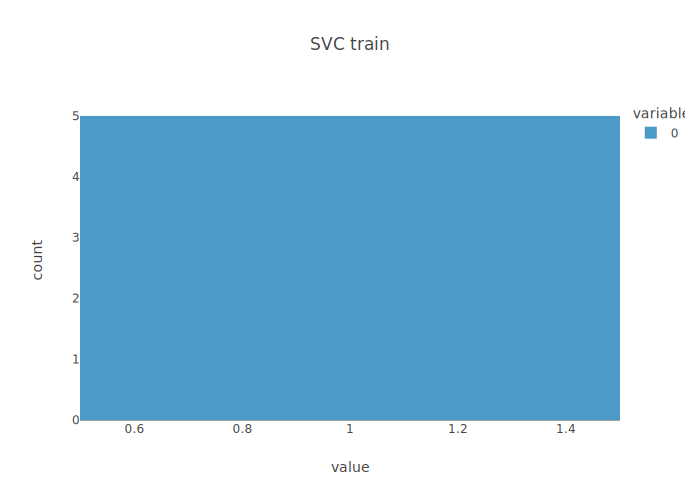

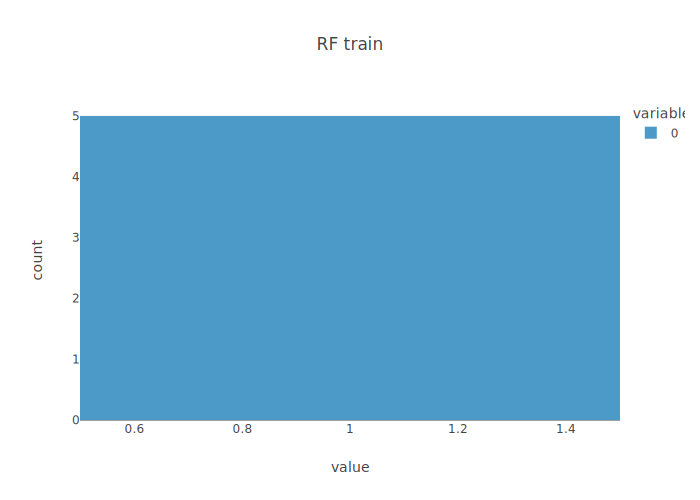

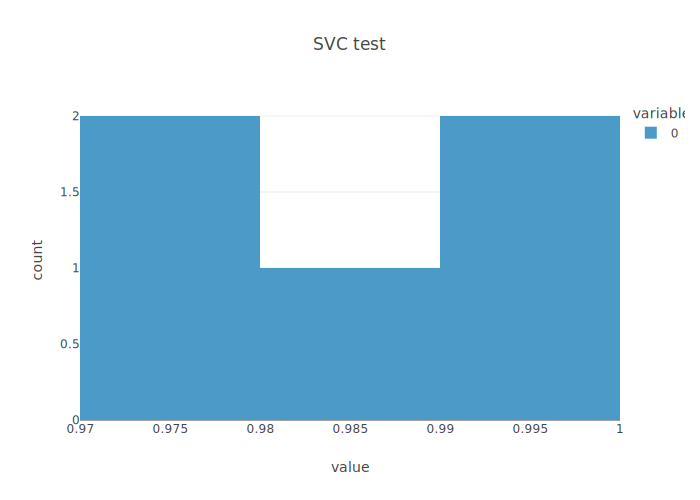

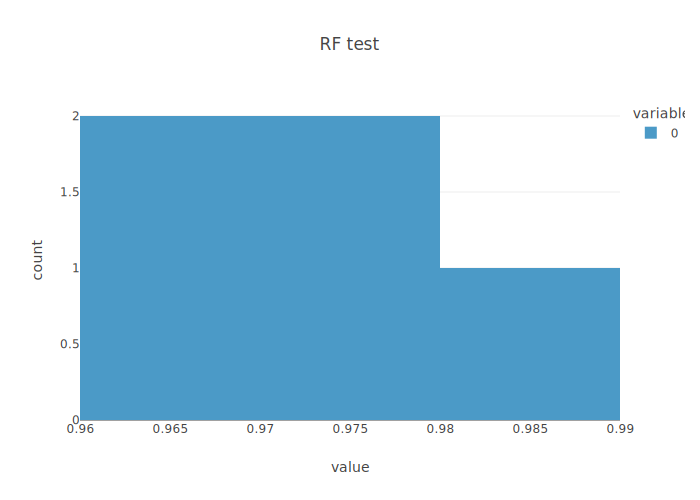

8. Now compute the scores of both best models on the hold out test set, are the results coherent with those of the cross validation ?

In [226]:
print("best svc score on the hold out test set : \n {0} \n best rf score on the hold out test set : \n {1}".format(svc_grid.best_estimator_.score(X_test,y_test), rf_grid.best_estimator_.score(X_test,y_test)))

best svc score on the hold out test set : 
 0.9911111111111112 
 best rf score on the hold out test set : 
 0.98


### Three way hold out method
9. To finish off the exercise, we are going to compare the cross validation technique with the three way hold out method which is indicated for very large dataset (it is not ideal theoretically speaking but it saves a lot of computing power and execution time)
Run a grid search cv across the same parameter grids as before but impose the train validation split by setting the argument ```cv=zip([train_index],[valid_index])``` the train and valid indexes need to be taken from the original train set from the first split, we will use the test set at the end to compare scores.
Also make sure to measure the execution time for each training.

In [227]:
X_train = pd.DataFrame(X_train)
X_three_way_train, X_valid, y_three_way_train, y_valid = train_test_split(X_train,y_train)

svc_grid = GridSearchCV(svc, param_grid=svc_param_grid,cv=zip([X_three_way_train.index],[X_valid.index]))
rf_grid  = GridSearchCV(rf, param_grid=rf_param_grid,cv=zip([X_three_way_train.index],[X_valid.index]))

%time svc_grid.fit(X_train,y_train)
%time rf_grid.fit(X_train,y_train)

CPU times: total: 172 ms
Wall time: 715 ms
CPU times: total: 17 s
Wall time: 1min 17s


GridSearchCV(cv=<zip object at 0x0000025CFD676E40>,
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15]),
                         'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551])})

CPU times: user 1.31 s, sys: 997 µs, total: 1.31 s
Wall time: 1.31 s
CPU times: user 1min, sys: 337 ms, total: 1min 1s
Wall time: 1min 1s


GridSearchCV(cv=<zip object at 0x7f5722b83a40>,
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15]),
                         'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551])})

10. What are the best parameters for each model ?

In [228]:
print("the best set of parameters for the svm model is : \n {0} \n the best set of parameters for the random forest is : \n {1} ".format(svc_grid.best_params_, rf_grid.best_params_))

the best set of parameters for the svm model is : 
 {'C': 10.0, 'kernel': 'rbf'} 
 the best set of parameters for the random forest is : 
 {'max_depth': 11, 'n_estimators': 301} 


the best set of parameters for the svm model is : 
 {'C': 1.0, 'kernel': 'rbf'} 
 the best set of parameters for the random forest is : 
 {'max_depth': 11, 'n_estimators': 251} 


11. Calculate the final score for each model using the hold out test set, what can you conclude about the k-fold method vs the three way hold out method?

In [229]:
print("best svc score on the hold out test set : \n {0} \n best rf score on the hold out test set : \n {1}".format(svc_grid.best_estimator_.score(X_test,y_test), rf_grid.best_estimator_.score(X_test,y_test)))

best svc score on the hold out test set : 
 0.9911111111111112 
 best rf score on the hold out test set : 
 0.9777777777777777


best svc score on the hold out test set : 
 0.9933333333333333 
 best rf score on the hold out test set : 
 0.9822222222222222
